# 1. 프로젝트 주제선정


### 가상화폐 국내 거래소의 비트코인 거래량과 국내 청년(대학생) 대출의 상관관계를 Pandas와 matplotlib 라이브러리를 이용하여 코로나 기간에(2020/01/01 ~ 2021/12/31) 월별로 분석하기.

# 2. 주제선정이유 및 방향성

최근 '영끌', '빚투' 라는 단어들을 기사나 뉴스보도에서 자주 보곤 한다. <br> 이는 2019년 말 부터 시작된 코로나-19의 영향으로 인해, 청년들의 투자열풍으로 인해 생긴 신조어들이다.<br> 그 당시부터, 투자와 대출을 둘다 해본 청년으로서, 뉴스나 기사에서 말하는 '투자로 인한 청년 부채 : 소득의 3배 이상'과 같은 내용들의 데이터 자료 근거들이 궁금해졌고, 투자상품의 데이터 자료와의 연관성을 찾아 나만의 데이터로 만들고 싶어졌다.<br> 투자에는 주식이나 부동산, 여러가지 상품들이 있다.<br> 하지만, 가상화폐에 투자를 해온 경험이 있고, 다른 주력상품들에 비해 가상화폐에 대해 아는 정보가 많아, 투자상품을 가상화폐(주력상품인 비트코인)로 한정 지어 국내 청년 대출 데이터와의 상관관계를 ``python``과 ``Pandas, matplotlib, numpy`` 라이브러리를 통해 정확한 데이터 정보로 밝히고자 한다.<br> 뉴스와 기사에서 반복해서 나오듯이 투자 상품과 대출과의 연관성은 어느정도 있다.<br> 이 연관성을 ``Term-project``를 통해 정확한 시각화 데이터로 추출하여 데이터 자료로 직접적으로 확인하는 것이 큰 목적이다.<br> 초기 데이터(국내 거래소의(업비트, 빗썸, 코인원)비트코인의 데이터, 국내 청년(대학생) 대출 건수 데이터)을 통해 ``Pandas``로 가공, ``matplotlib``으로 시각화하여 초기 결과를 기간별로 도출해내고, 추가적인 데이터가 필요하다면 그때마다 가공하여 추가하면서 최종적인 결론을 도출해낼 것이다.

# 3. 가설 및 목표

##### (가설) 비트코인의 거래량이 많은 지점에는 국내 청년(대학생) 대출 건수도 많을 것이다.
##### (목표) 비트코인의 거래량 데이터와 국내 청년(대학생) 대출 건수의 데이터의 Pandas가공, matplotlib을 통한 시각화 

# 4. 데이터 가공

### (1) 비트코인 csv 데이터 가공
우선, 우리가 필요한 데이터는 월별 평균 거래량 데이터이다.<br>
현재 국내 거래소 3개(업비트, 빗썸, 코인원)의 비트코인 2020 ~ 2021 까지의 과거 데이터를 2020년, 2021년 따로따로 날짜와 거래량순으로 정리한다.<br>
원본의 데이터는 날짜가 일별로 되어 있고, 칼럼의 인덱스는 날짜, 종가, 시가, 고가, 저가, 거래량, 변동 % 순으로 데이터가 정렬이 되어있다.<br>
우리는 이를 우선 2020, 2021년도별로 자른뒤, 월별당 평균 거래량 데이터를 표기하도록 수정할 것이다.<br>

In [2]:
import pandas as pd

In [3]:
#BTC_KRW Upbit
print("BTC_KRW Upbit 날짜별 거래량")
df = pd.read_csv('BTC_KRW Upbit 과거 데이터.csv')
df_utv = df.drop(['종가', '시가', '고가', '저가', '변동 %'], axis = 1)
df_utv

BTC_KRW Upbit 날짜별 거래량


,날짜,거래량
0,2021- 12- 31,4.96K
1,2021- 12- 30,5.51K
2,2021- 12- 29,8.04K
3,2021- 12- 28,7.30K
4,2021- 12- 27,5.29K
...,...,...
726,2020- 01- 05,2.81K
727,2020- 01- 04,1.99K
728,2020- 01- 03,5.89K
729,2020- 01- 02,2.05K


In [4]:
#데이터프레임 타입 변경 전 확인
df_utv.dtypes

날짜     object
거래량    object
dtype: object

In [5]:
print("필요한 열 데이터 타입 변경")
df_utv['날짜'] = pd.to_datetime(df_utv['날짜']) #'날짜'열 데이터프레임 타입 변경 --> datetime
df_utv['거래량'] = df_utv['거래량'].str.replace(pat = r'[K]', repl = r'', regex = True) #거래량부분의 문자열 'k' 삭제
df_utv['거래량'] = pd.to_numeric(df_utv['거래량']) #'거래량'열 데이터프레임 타입 변경 --> float
df_utv

필요한 열 데이터 타입 변경


,날짜,거래량
0,2021-12-31,4.96
1,2021-12-30,5.51
2,2021-12-29,8.04
3,2021-12-28,7.30
4,2021-12-27,5.29
...,...,...
726,2020-01-05,2.81
727,2020-01-04,1.99
728,2020-01-03,5.89
729,2020-01-02,2.05


In [6]:
#데이터프레임 타입 변경 후 확인
df_utv.dtypes 

날짜     datetime64[ns]
거래량           float64
dtype: object

In [7]:
print("BTC_KRW Upbit 2020년 날짜별 거래량")
df_utv2020 = df_utv[df_utv['날짜'].between('2020-01-01', '2020-12-31')].copy() #2020년 사이의 날짜 데이터만 추출 (copy 메소드를 붙히는 이유는 SettingWithCopyWarning 발생을 막기위함.)
df_utv2020

BTC_KRW Upbit 2020년 날짜별 거래량


,날짜,거래량
365,2020-12-31,8.04
366,2020-12-30,10.28
367,2020-12-29,7.30
368,2020-12-28,8.18
369,2020-12-27,19.90
...,...,...
726,2020-01-05,2.81
727,2020-01-04,1.99
728,2020-01-03,5.89
729,2020-01-02,2.05


In [8]:
df_utv2020['월'] = df_utv2020['날짜'].dt.month #'날짜'열에서 그달의 월을 '월'열을 추가하여 작성

In [9]:
print("BTC_KRW Upbit 2020년 월별 평균 거래량")
df_utv2020m = df_utv2020.groupby(by='월').mean() #'월'열의 같은 달의 평균을 계산
df_utv2020m['거래량'] = df_utv2020m['거래량'] * 1000 #k의 단위를 생략하고 가공했으므로 곱함
df_utv2020m['거래량'] = df_utv2020m['거래량'].round(0) #소수점 반올림
df_utv2020m

BTC_KRW Upbit 2020년 월별 평균 거래량


,거래량
월,
1,4871.0
2,4884.0
3,11137.0
4,5717.0
5,6086.0
6,2760.0
7,2798.0
8,4773.0
9,3199.0


In [10]:
print("BTC_KRW Upbit 2021년 날짜별 거래량")
df_utv2021 = df_utv[df_utv['날짜'].between('2021-01-01', '2021-12-31')].copy() #2021년 사이의 날짜 데이터만 추출
df_utv2021

BTC_KRW Upbit 2021년 날짜별 거래량


,날짜,거래량
0,2021-12-31,4.96
1,2021-12-30,5.51
2,2021-12-29,8.04
3,2021-12-28,7.30
4,2021-12-27,5.29
...,...,...
360,2021-01-05,13.46
361,2021-01-04,23.60
362,2021-01-03,25.38
363,2021-01-02,17.45


In [11]:
df_utv2021['월'] = df_utv2021['날짜'].dt.month #'날짜'열에서 그달의 월을 '월'열을 추가하여 작성

In [12]:
print("BTC_KRW Upbit 2021년 월별 평균 거래량")
df_utv2021m = df_utv2021.groupby(by='월').mean() #'월'열의 같은 달의 평균을 계산
df_utv2021m['거래량'] = df_utv2021m['거래량'] * 1000
df_utv2021m['거래량'] = df_utv2021m['거래량'].round(0)
df_utv2021m

BTC_KRW Upbit 2021년 월별 평균 거래량


,거래량
월,
1,16205.0
2,13659.0
3,9628.0
4,11023.0
5,15871.0
6,13099.0
7,6438.0
8,10251.0
9,7858.0


마찬가지로 빗썸, 코인원 csv 데이터도 같은 작업을 반복.

In [13]:
#BTC_KRW 빗썸
df2 = pd.read_csv('BTC_KRW 빗썸 과거 데이터.csv')
df_btv = df2.drop(['종가', '시가', '고가', '저가', '변동 %'], axis = 1)
df_btv['날짜'] = pd.to_datetime(df_btv['날짜'])
df_btv['거래량'] = df_btv['거래량'].str.replace(pat = r'[K]', repl = r'', regex = True)
df_btv['거래량'] = pd.to_numeric(df_btv['거래량'])

In [14]:
#BTC_KRW 빗썸 2020년 월별 평균 거래량
print('BTC_KRW 빗썸 2020년 월별 평균 거래량')
df_btv2020 = df_btv[df_btv['날짜'].between('2020-01-01', '2020-12-31')].copy()
df_btv2020['월'] = df_btv2020['날짜'].dt.month
df_btv2020m = df_btv2020.groupby(by='월').mean()
df_btv2020m['거래량'] = df_btv2020m['거래량'] * 1000
df_btv2020m['거래량'] = df_btv2020m['거래량'].round(0)
df_btv2020m

BTC_KRW 빗썸 2020년 월별 평균 거래량


,거래량
월,
1,1228.0
2,1068.0
3,3035.0
4,1789.0
5,1831.0
6,1015.0
7,874.0
8,1017.0
9,863.0


In [15]:
#BTC_KRW 빗썸 2021년 월별 평균 거래량
print('BTC_KRW 빗썸 2021년 월별 평균 거래량')
df_btv2021 = df_btv[df_btv['날짜'].between('2021-01-01', '2021-12-31')].copy()
df_btv2021['월'] = df_btv2021['날짜'].dt.month
df_btv2021m = df_btv2021.groupby(by='월').mean()
df_btv2021m['거래량'] = df_btv2021m['거래량'] * 1000
df_btv2021m['거래량'] = df_btv2021m['거래량'].round(0)
df_btv2021m

BTC_KRW 빗썸 2021년 월별 평균 거래량


,거래량
월,
1,3285.0
2,2351.0
3,1841.0
4,1292.0
5,1701.0
6,1357.0
7,666.0
8,784.0
9,693.0


In [16]:
#BTC_KRW 코인원
df3 = pd.read_csv('BTC_KRW 코인원 과거 데이터.csv')
df_ctv = df3.drop(['종가', '시가', '고가', '저가', '변동 %'], axis = 1)
df_ctv['날짜'] = pd.to_datetime(df_ctv['날짜'])
df_ctv['거래량'] = df_ctv['거래량'].str.replace(pat = r'[K]', repl = r'', regex = True)
df_ctv['거래량'] = pd.to_numeric(df_ctv['거래량'])

In [17]:
#BTC_KRW 코인원 2020년 월별 평균 거래량
print('BTC_KRW 코인원 2020년 월별 평균 거래량')
df_ctv2020 = df_ctv[df_ctv['날짜'].between('2020-01-01', '2020-12-31')].copy()
df_ctv2020['월'] = df_ctv2020['날짜'].dt.month
df_ctv2020m = df_ctv2020.groupby(by='월').mean()
df_ctv2020m['거래량'] = df_ctv2020m['거래량'] * 1000
df_ctv2020m['거래량'] = df_ctv2020m['거래량'].round(0)
df_ctv2020m

BTC_KRW 코인원 2020년 월별 평균 거래량


,거래량
월,
1,2112.0
2,2287.0
3,5641.0
4,2806.0
5,2687.0
6,1402.0
7,1737.0
8,2402.0
9,2311.0


In [18]:
#BTC_KRW 코인원 2021년 월별 평균 거래량
print('BTC_KRW 코인원 2021년 월별 평균 거래량')
df_ctv2021 = df_ctv[df_ctv['날짜'].between('2021-01-01', '2021-12-31')].copy()
df_ctv2021['월'] = df_ctv2021['날짜'].dt.month
df_ctv2021m = df_ctv2021.groupby(by='월').mean()
df_ctv2021m['거래량'] = df_ctv2021m['거래량'] * 1000
df_ctv2021m['거래량'] = df_ctv2021m['거래량'].round(0)
df_ctv2021m

BTC_KRW 코인원 2021년 월별 평균 거래량


,거래량
월,
1,4364.0
2,3509.0
3,1888.0
4,2945.0
5,4355.0
6,2207.0
7,1140.0
8,1475.0
9,1276.0


### (2) 국내 청년(대학생) 대출 건수 데이터 가공
2020 ~ 2021 국내 청년(대학생) 대출 건수 초기 데이터를 한국장학재단의 등록금대출, 생활비대출 건수로 잡았다.<br>
여기서 등록금대출은 등록금감면의 경우도 있으므로, 등록금대출을 제외한 생활비대출만 추출해낼 것이다.<br>
생활비대출의 종류는 일반상환학자금, 취업후상환학자금 두 종류가 있지만, 둘다 포함하여 데이터를 추출해낼 것이다.<br>
초기 데이터가 일별로 나와있어, 가공한 코인 데이터처럼 월별당 생활비대출건수 데이터로 만들어낼 것이다. <br>

In [19]:
#한국장학재단_2020 대출일별건수 필요없는 행,열 제거
print('한국장학재단_2020 대출일별건수 필요없는 행,열 제거')
df = pd.read_csv('한국장학재단_2020 대출일별건수.csv', encoding='CP949') 
df = df.drop(['당일신규실행금액(억원)'], axis = 1)
case = df[df['상품명'].str.contains('등록금')].index #'상품명'열에 등록금을 포함하는 문자열을 추출한다를 조건문으로 만듦.
df = df.drop(case)
df['기준일자'] = pd.to_datetime(df['기준일자'])
df['당일신규실행건수'] = pd.to_numeric(df['당일신규실행건수'])
df

한국장학재단_2020 대출일별건수 필요없는 행,열 제거


,기준일자,상품명,당일신규실행건수
1,2020-01-01,일반상환학자금_생활비,0
3,2020-01-01,취업후상환학자금_생활비,0
5,2020-01-09,일반상환학자금_생활비,421
7,2020-01-09,취업후상환학자금_생활비,48
9,2020-01-10,일반상환학자금_생활비,300
...,...,...,...
1431,2020-12-29,취업후상환학자금_생활비,0
1433,2020-12-30,일반상환학자금_생활비,0
1435,2020-12-30,취업후상환학자금_생활비,0
1437,2020-12-31,일반상환학자금_생활비,0


In [20]:
#한국장학재단_2020 대출일별건수 월별건수로 가공
print('한국장학재단_2020 월별대출건수')
df['월'] = df['기준일자'].dt.month
df_month2020 = df.groupby(by='월').sum()
df_month2020 = df_month2020.rename(columns={'당일신규실행건수':'월별대출건수'})
df_month2020

한국장학재단_2020 월별대출건수


,월별대출건수
월,
1,21790
2,159110
3,94165
4,58259
5,12783
6,0
7,20563
8,152800
9,106565


In [21]:
#한국장학재단_2021 대출일별건수 필요없는 행,열 제거
print('한국장학재단_2021 대출일별건수 필요없는 행,열 제거')
df = pd.read_csv('한국장학재단_2021 대출일별건수.csv', encoding='CP949') 
df = df.drop(['당일신규실행금액(억원)'], axis = 1)
case = df[df['상품명'].str.contains('등록금')].index
df = df.drop(case)
df['기준일자'] = pd.to_datetime(df['기준일자'])
df['당일신규실행건수'] = pd.to_numeric(df['당일신규실행건수'])
df

한국장학재단_2021 대출일별건수 필요없는 행,열 제거


,기준일자,상품명,당일신규실행건수
1,2021-01-01,일반상환학자금_생활비,0
3,2021-01-01,취업후상환학자금_생활비,0
5,2021-01-07,일반상환학자금_생활비,351
7,2021-01-07,취업후상환학자금_생활비,30
9,2021-01-08,일반상환학자금_생활비,267
...,...,...,...
1431,2021-12-29,취업후상환학자금_생활비,0
1433,2021-12-30,일반상환학자금_생활비,0
1435,2021-12-30,취업후상환학자금_생활비,0
1437,2021-12-31,일반상환학자금_생활비,0


In [22]:
#한국장학재단_2021 대출일별건수 월별건수로 가공
print('한국장학재단_2021 월별대출건수')
df['월'] = df['기준일자'].dt.month
df_month2021 = df.groupby(by='월').sum()
df_month2021 = df_month2021.rename(columns={'당일신규실행건수':'월별대출건수'})
df_month2021

한국장학재단_2021 월별대출건수


,월별대출건수
월,
1,16987
2,130749
3,95388
4,51571
5,19697
6,0
7,31958
8,147857
9,78152


# 5. 분석 결과 도출
csv데이터들을 원하는 데이터프레임형태로 가공을 했으니, 이제 그래프로 나타내어 시각화하도록 하자.<br>
이는, ```numpy```, ```matplotlib```라이브러리를 사용할것이다.<br>
월별 비트코인 거래량 데이터와 한국장학재단 2020, 2021년도 월별대출건수 데이터 값의 차가 많이 나서, 따로 시각화 할 것이다.<br>
월별 비트코인 거래량 데이터는 년도별로 3개의 국내거래소를 묶어 꺾은선 그래프로 나타낼 것이고, <br>
한국장학재단 월별대출건수 데이터는 2020, 2021년도 한번에 묶어서 꺾은선 그래프로 나타낼 것이다. <br>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

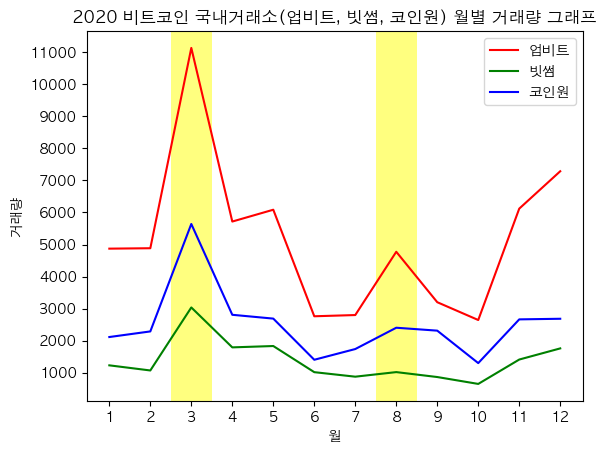

In [26]:
#2020 비트코인 국내거래소(업비트, 빗썸, 코인원) 월별 거래량 그래프
plt.title('2020 비트코인 국내거래소(업비트, 빗썸, 코인원) 월별 거래량 그래프')
plt.xlabel('월')
plt.ylabel('거래량')
x = range(1,13)
plt.xticks(np.arange(1,13,1))
plt.yticks(np.arange(0,14000,1000))
plt.plot(x, df_utv2020m['거래량'], label='업비트', color='r')
plt.plot(x, df_btv2020m['거래량'], label='빗썸', color='g')
plt.plot(x, df_ctv2020m['거래량'], label='코인원', color='b')
plt.axvspan(2.5, 3.5, facecolor='yellow', alpha=0.5)
plt.axvspan(7.5, 8.5, facecolor='yellow', alpha=0.5)

plt.legend()

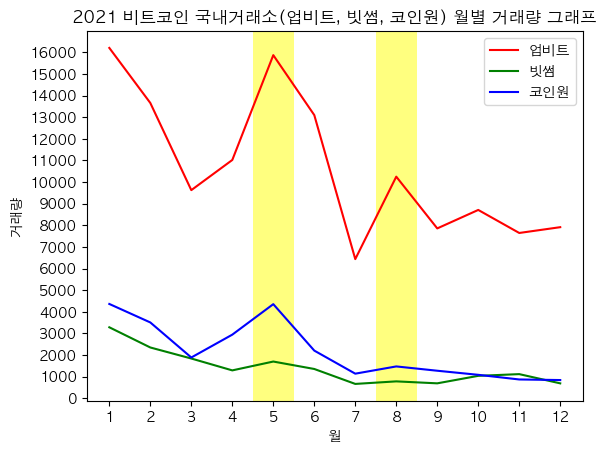

In [27]:
#2021 비트코인 국내거래소(업비트, 빗썸, 코인원) 월별 거래량 그래프
plt.title('2021 비트코인 국내거래소(업비트, 빗썸, 코인원) 월별 거래량 그래프')
plt.xlabel('월')
plt.ylabel('거래량')
x = range(1,13)
plt.xticks(np.arange(1,13,1))
plt.yticks(np.arange(0,17000,1000))
plt.plot(x, df_utv2021m['거래량'], label='업비트', color='r')
plt.plot(x, df_btv2021m['거래량'], label='빗썸', color='g')
plt.plot(x, df_ctv2021m['거래량'], label='코인원', color='b')
plt.axvspan(4.5, 5.5, facecolor='yellow', alpha=0.5)
plt.axvspan(7.5, 8.5, facecolor='yellow', alpha=0.5)

plt.legend()

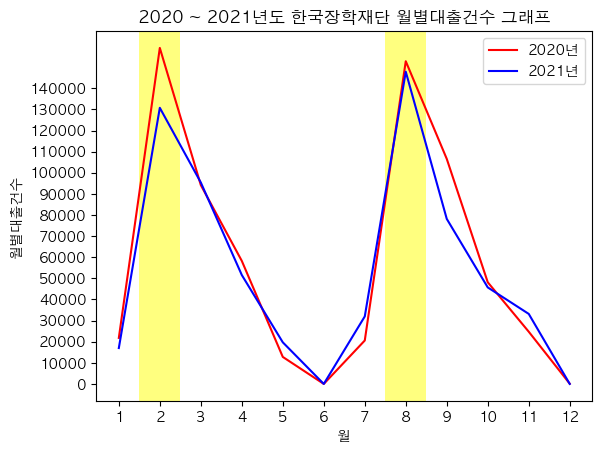

In [28]:
#2020 ~ 2021년도 한국장학재단 월별대출건수 그래프
plt.title('2020 ~ 2021년도 한국장학재단 월별대출건수 그래프')
plt.xlabel('월')
plt.ylabel('월별대출건수')
x = range(1,13)
plt.xticks(np.arange(1,13,1))
plt.yticks(np.arange(0,150000,10000))
plt.plot(x, df_month2020['월별대출건수'], label='2020년', color='r')
plt.plot(x, df_month2021['월별대출건수'], label='2021년', color='b')
plt.axvspan(1.5, 2.5, facecolor='yellow', alpha=0.5)
plt.axvspan(7.5, 8.5, facecolor='yellow', alpha=0.5)

plt.legend()

# 6. 결론


2020년 비트코인 국내거래소의 그래프를 보면 3월과 8월의 거래량이 가장 뚜렷하다. <br>
이는 2020 ~ 2021년도 한국장학재단 3월과 8월 대출건수가 뚜렷함과 일치하고, 이는 2020년도에는 어느정도 청년(대학생)들이 생활비 대출을 통한 비트코인 거래를 했다는 것이다. <br>
반면, 2021년 비트코인 국내거래소의 그래프를 보면 3, 5, 7, 8월달의 거래량 변화가 심하고, 이는 위 2020 ~ 2021년도 한국장학재단 그래프로서는 청년(대학생)들이 생활비 대출을 통해 비트코인 거래를 했다는 것을 알 수 없다.

# 7. 획득한 데이터 주소


- 비트코인 과거 데이터 (업비트, 빗썸, 코인원) : https://kr.investing.com/crypto/bitcoin/historical-data 


- 한국장학재단_일일대출실행통계 : https://www.data.go.kr/data/15069284/fileData.do

# 8. 가공된 데이터

In [33]:
print("BTC_KRW Upbit 2020년 월별 평균 거래량 데이터 원본")
df_utv2020m

BTC_KRW Upbit 2020년 월별 평균 거래량 데이터 원본


,거래량
월,
1,4871.0
2,4884.0
3,11137.0
4,5717.0
5,6086.0
6,2760.0
7,2798.0
8,4773.0
9,3199.0


In [31]:
print("BTC_KRW Upbit 2021년 월별 평균 거래량 데이터 원본")
df_utv2021m

BTC_KRW Upbit 2021년 월별 평균 거래량 데이터 원본


,거래량
월,
1,16205.0
2,13659.0
3,9628.0
4,11023.0
5,15871.0
6,13099.0
7,6438.0
8,10251.0
9,7858.0


In [32]:
print('BTC_KRW 빗썸 2020년 월별 평균 거래량 데이터 원본')
df_btv2020m

BTC_KRW 빗썸 2020년 월별 평균 거래량 데이터 원본


,거래량
월,
1,1228.0
2,1068.0
3,3035.0
4,1789.0
5,1831.0
6,1015.0
7,874.0
8,1017.0
9,863.0


In [36]:
print('BTC_KRW 빗썸 2021년 월별 평균 거래량 데이터 원본')
df_btv2021m

BTC_KRW 빗썸 2021년 월별 평균 거래량 데이터 원본


,거래량
월,
1,3285.0
2,2351.0
3,1841.0
4,1292.0
5,1701.0
6,1357.0
7,666.0
8,784.0
9,693.0


In [37]:
print('BTC_KRW 코인원 2020년 월별 평균 거래량 데이터 원본')
df_ctv2020m

BTC_KRW 코인원 2020년 월별 평균 거래량 데이터 원본


,거래량
월,
1,2112.0
2,2287.0
3,5641.0
4,2806.0
5,2687.0
6,1402.0
7,1737.0
8,2402.0
9,2311.0


In [39]:
print('BTC_KRW 코인원 2021년 월별 평균 거래량 데이터 원본')
df_ctv2021m

BTC_KRW 코인원 2021년 월별 평균 거래량 데이터 원본


,거래량
월,
1,4364.0
2,3509.0
3,1888.0
4,2945.0
5,4355.0
6,2207.0
7,1140.0
8,1475.0
9,1276.0


In [40]:
print('한국장학재단_2020 월별대출건수 데이터 원본')
df_month2020

한국장학재단_2020 월별대출건수 데이터 원본


,월별대출건수
월,
1,21790
2,159110
3,94165
4,58259
5,12783
6,0
7,20563
8,152800
9,106565


In [41]:
print('한국장학재단_2021 월별대출건수 데이터 원본')
df_month2021

한국장학재단_2021 월별대출건수 데이터 원본


,월별대출건수
월,
1,16987
2,130749
3,95388
4,51571
5,19697
6,0
7,31958
8,147857
9,78152


# 9. 별첨

- BTC_KRW Upbit 과거 데이터.csv


- BTC_KRW 빗썸 과거 데이터.csv



- BTC_KRW 코인원 과거 데이터.csv



- 한국장학재단_2020 대출일별건수.csv



- 한국장학재단_2021 대출일별건수.csv